In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2015data.csv to 2015data.csv


In [2]:
#Create Standard Dev
def stan_dev(inp):
  mean = sum(inp)/len(inp)
  vari = 0
  for a in range(len(inp)):
    vari = vari + (1/(len(inp)-1))*(inp[a]-mean)*(inp[a]-mean)
  return(vari**0.5)

#Regression Function
def reg(inp1, inp2):
  mean1 = sum(inp1)/len(inp1)
  mean2 = sum(inp2)/len(inp2)
  vari1 = 0
  vari2 = 0
  for a in range(len(inp1)):
    vari1 = vari1 + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp1[a]-mean1)

  for a in range(len(inp1)):
    vari2 = vari2 + (1/(len(inp2)-1))*(inp2[a]-mean2)*(inp2[a]-mean2)

  std1 = vari1**0.5
  std2 = vari2**0.5

  r = 0
  for a in range(len(inp1)):
    r = r + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp2[a]-mean2)/(std1*std2)
  
  B = r*std2/std1
  A = mean2-mean1*B

  return [std1, vari2, r, A, B]

#data fixing
def isNaN(ni):
  return ni != ni


In [3]:
import io
import numpy as np
import pandas as pd

#Convert raw data to a usable dataframe array
df_sleep = pd.read_csv(io.BytesIO(uploaded['2015data.csv']))
array_sleep = df_sleep.to_numpy()

In [4]:
#Create a list of average sleep
avg_weekdays = array_sleep[:, 25]
avg_weekends = array_sleep[:, 33]

for a in range(len(avg_weekdays)):
  if isNaN(avg_weekdays[a]) == True:
    avg_weekdays[a] = 475.3
  if isNaN(avg_weekends[a]) == True:
    avg_weekends[a] = 524.25
    
avg_total = list(np.add(avg_weekdays*5/(60*7), avg_weekends*2/(60*7)))
#print(avg_total)


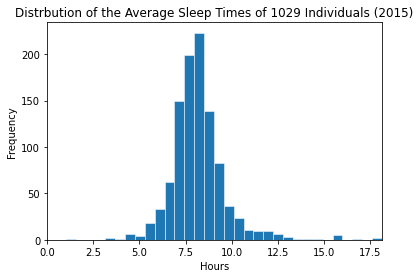

In [5]:
import matplotlib.pyplot as plt

#Make data
x = avg_total

#Limits
xlow = min(avg_total)
xhigh = max(avg_total)

#Plot:
fig, ax = plt.subplots()

ax.hist(x, bins=32, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, xhigh))

plt.title("Distrbution of the Average Sleep Times of 1029 Individuals (2015)")
plt.xlabel("Hours")
plt.ylabel("Frequency")

plt.show()

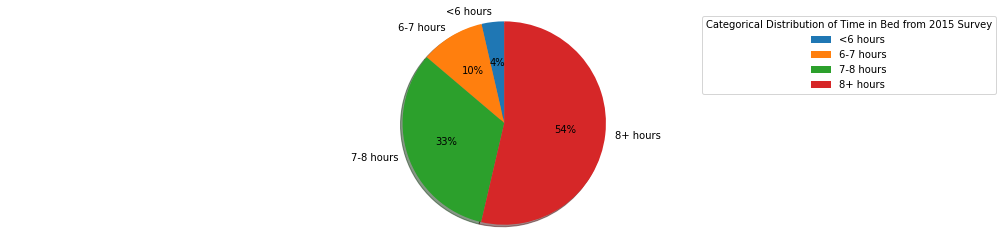

In [6]:
#Proportion of those who slept: (<6), (6-7), (7, 8), (8+) hours
p1 = 0
p2 = 0
p3 = 0
p4 = 0
for num in avg_total:
  if num < 6:
    p1 += 1
  elif num < 7:
    p2 += 1
  elif num < 8:
    p3 += 1
  else:
    p4 += 1

#Narrow Pie Chart
labels = ["<6 hours", "6-7 hours", "7-8 hours", "8+ hours"]
sizes = [p1, p2, p3, p4]
explode=[0,0,0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Time in Bed from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

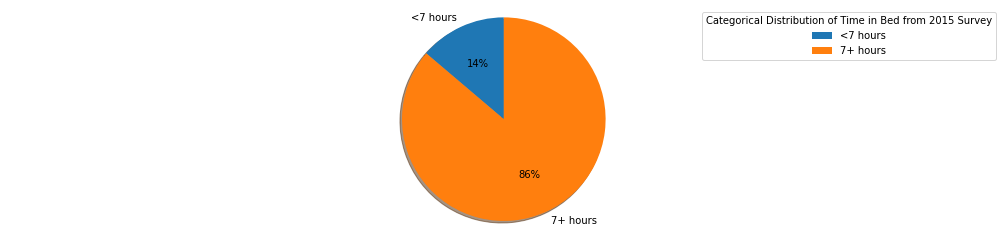

In [7]:
#Broad Pie Chart
labels = ["<7 hours", "7+ hours"]
sizes = [p1+p2, p3+p4]
explode=[0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Time in Bed from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


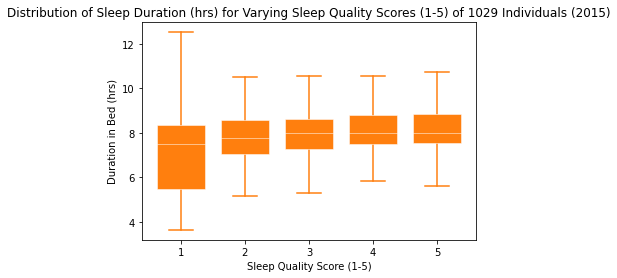

In [103]:
#Relationship between sleep duration and sleep quality
sleep_quality = array_sleep[:, 61]
sleep_quality = list(sleep_quality)

avg1 = []
avg2 = []
avg3 = []
avg4 = []
avg5 = []

for a in range(len(sleep_quality)):
  if sleep_quality[a] == 1:
    avg1.append(avg_total[a])
  if sleep_quality[a] == 2:
    avg2.append(avg_total[a])
  if sleep_quality[a] == 3:
    avg3.append(avg_total[a])
  if sleep_quality[a] == 4:
    avg4.append(avg_total[a])
  if sleep_quality[a] == 5:
    avg5.append(avg_total[a])

#Quantitative v. Categorical

# make data:
D = [avg1, avg2, avg3, avg4, avg5]
labels = ["1", "2", "3", "4", "5"]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, labels = labels, positions=[2, 4, 6, 8, 10], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
plt.xlabel("Sleep Quality Score (1-5)")
plt.ylabel("Duration in Bed (hrs)")
plt.title("Distribution of Sleep Duration (hrs) for Varying Sleep Quality Scores (1-5) of 1029 Individuals (2015)")

plt.show()


In [83]:
#Chi Squared Test for Independence

#Observed Counts
r1c1 = []
r1c2 = []
r1c3 = []
r1c4 = []
r1c5 = []

r2c1 = []
r2c2 = []
r2c3 = []
r2c4 = []
r2c5 = []

r3c1 = []
r3c2 = []
r3c3 = []
r3c4 = []
r3c5 = []

r4c1 = []
r4c2 = []
r4c3 = []
r4c4 = []
r4c5 = []

row1 = [r1c1, r1c2, r1c3, r1c4, r1c5]
row2 = [r2c1, r2c2, r2c3, r2c4, r2c5]
row3 = [r3c1, r3c2, r3c3, r3c4, r3c5]
row4 = [r4c1, r4c2, r4c3, r4c4, r4c5]

for a in range(len(avg_total)):
  for b in range(len(row1)):
    if avg_total[a] < 6 and sleep_quality[a] == b+1:
      row1[b].append(a)
    if 6 <= avg_total[a] < 7 and sleep_quality[a] == b+1:
      row2[b].append(a)
    if 7 <= avg_total[a] < 8 and sleep_quality[a] == b+1:
      row3[b].append(a)
    if 8 <= avg_total[a] and sleep_quality[a] == b+1:
      row4[b].append(a)

for a in range(len(row1)):
  row1[a] = len(row1[a])
  row2[a] = len(row2[a])
  row3[a] = len(row3[a])
  row4[a] = len(row4[a])

two_way_tab = np.array([row1, row2, row3, row4])

row_sums = np.array([[sum(row1)], [sum(row2)], [sum(row3)], [sum(row4)], [1029]])

column_sums = np.array([np.add(np.add(np.add(np.array(row1), np.array(row2)), np.array(row3)), np.array(row4))])
two_way_tab = np.append(two_way_tab, column_sums, axis=0)
two_way_tab = np.append(two_way_tab, row_sums, axis=1)

two_way_df = pd.DataFrame(two_way_tab)
two_way_df.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_df.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Duration in Bed (hrs)")
print(two_way_df)

#Expected Counts
two_way_tab2 = np.empty((4, 5), float)

row_sums_list = [sum(row1), sum(row2), sum(row3), sum(row4)]
column_sums_list = list(two_way_tab[4, 0:5])

for a in range(len(row_sums_list)):
  for b in range(len(column_sums_list)):
    two_way_tab2[a, b] = float(two_way_tab2[a, b])
    two_way_tab2[a, b] = np.around(float(row_sums_list[a]*column_sums_list[b]/1029), 3)

two_way_tab2 = np.append(two_way_tab2, column_sums, axis=0)
two_way_tab2 = np.append(two_way_tab2, row_sums, axis=1)

two_way_dfE = pd.DataFrame(two_way_tab2)
two_way_dfE.columns = ["1", "2", "3", "4", "5", "Total"]
two_way_dfE.index = ["<6 hrs", "6-7 hrs", "7-8 hrs", "8+ hours", "Total"]

print("")
print("Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Duration in Bed (hrs)")
print(two_way_dfE)

Observed Counts for Relative Frequency of Sleep Quality (1-5) vs. Duration in Bed (hrs)
           1   2    3    4    5  Total
<6 hrs     8   9   14    3    3     37
6-7 hrs    4   9   44   38   10    105
7-8 hrs    6  31  116  139   43    335
8+ hours  11  42  184  226   89    552
Total     29  91  358  406  145   1029

Expected Counts for Relative Frequency of Sleep Quality (1-5) vs. Duration in Bed (hrs)
               1       2        3        4        5   Total
<6 hrs     1.043   3.272   12.873   14.599    5.214    37.0
6-7 hrs    2.959   9.286   36.531   41.429   14.796   105.0
7-8 hrs    9.441  29.626  116.550  132.177   47.206   335.0
8+ hours  15.557  48.816  192.047  217.796   77.784   552.0
Total     29.000  91.000  358.000  406.000  145.000  1029.0


In [98]:
#Chi Squared Test Statistic
#Note: Three out of the twenty (15%) expected counts are under 5. However, for general purposes, the chi quared test can be continued

row_num, col_num = two_way_tab2.shape

chi_sq_stat = 0
for a in range(row_num - 1):
  for b in range(col_num - 1):
    partial = ((two_way_tab[a, b] - two_way_tab2[a, b])**2)/two_way_tab2[a, b]
    chi_sq_stat += partial

print("The chi-squared statistic for ths test is: " + str(chi_sq_stat) +",which yields a p-value of less than 0.05")
print("However, upon examination there is only a significant difference in the distribution of duration in bed (hrs) for those who identified a sleep quality of 1.")

The chi-squared statistic for ths test is: 77.02421119484163,which yields a p-value of less than 0.05
However, upon examination there is only a significant difference in the distribution of duration in bed (hrs) for those who identified a sleep quality of 1.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


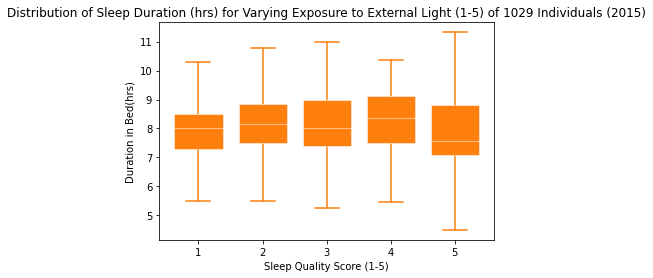

In [102]:
#Relationship Between Light Exposure (1-5) and Duration in Bed (hrs)
light_exp = array_sleep[:, 98]
light_exp = list(light_exp)

lig1 = []
lig2 = []
lig3 = []
lig4 = []
lig5 = []

for a in range(len(light_exp)):
  if light_exp[a] == 1:
    lig1.append(avg_total[a])
  if light_exp[a] == 2:
    lig2.append(avg_total[a])
  if light_exp[a] == 3:
    lig3.append(avg_total[a])
  if light_exp[a] == 4:
    lig4.append(avg_total[a])
  if light_exp[a] == 5:
    lig5.append(avg_total[a])

#Quantitative v. Categorical

# make data:
D = [lig1, lig2, lig3, lig4, lig5]
labels = ["1", "2", "3", "4", "5"]

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, labels = labels, positions=[2, 4, 6, 8, 10], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
plt.xlabel("Sleep Quality Score (1-5)")
plt.ylabel("Duration in Bed(hrs)")
plt.title("Distribution of Sleep Duration (hrs) for Varying Exposure to External Light (1-5) of 1029 Individuals (2015)")
plt.show()

No handles with labels found to put in legend.


Blue: Frequency of '1' responses
Orange: Frequency of '2' responses
Green: Frequency of '3' responses
Red: Frequency of '4' responses
Purple: Frequency of '5' responses



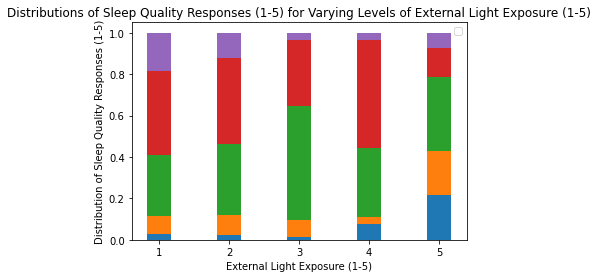

In [142]:
#Relationship Between Light Exposure and Sleep Quality
mlig1 = []
mlig2 = []
mlig3 = []
mlig4 = []
mlig5 = []

for a in range(len(light_exp)):
  if light_exp[a] == 1:
    mlig1.append(sleep_quality[a])
  if light_exp[a] == 2:
    mlig2.append(sleep_quality[a])
  if light_exp[a] == 3:
    mlig3.append(sleep_quality[a])
  if light_exp[a] == 4:
    mlig4.append(sleep_quality[a])
  if light_exp[a] == 5:
    mlig5.append(sleep_quality[a])

mlig1_summary = []
mlig2_summary = []
mlig3_summary = []
mlig4_summary = []
mlig5_summary = []

ml1s1, ml2s1, ml3s1, ml4s1, ml5s1 = 0, 0, 0, 0, 0
ml1s2, ml2s2, ml3s2, ml4s2, ml5s2 = 0, 0, 0, 0, 0
ml1s3, ml2s3, ml3s3, ml4s3, ml5s3 = 0, 0, 0, 0, 0
ml1s4, ml2s4, ml3s4, ml4s4, ml5s4 = 0, 0, 0, 0, 0
ml1s5, ml2s5, ml3s5, ml4s5, ml5s5 = 0, 0, 0, 0, 0

for a in range(len(mlig1)):
  if mlig1[a] == 1:
    ml1s1 += 1/len(mlig1)
  elif mlig1[a] == 2:
    ml2s1 += 1/len(mlig1)
  elif mlig1[a] == 3:
    ml3s1 += 1/len(mlig1)
  elif mlig1[a] == 4:
    ml4s1 += 1/len(mlig1)
  elif mlig1[a] == 5:
    ml5s1 += 1/len(mlig1)

for a in range(len(mlig2)):
  if mlig2[a] == 1:
    ml1s2 += 1/len(mlig2)
  elif mlig2[a] == 2:
    ml2s2 += 1/len(mlig2)
  elif mlig2[a] == 3:
    ml3s2 += 1/len(mlig2)
  elif mlig2[a] == 4:
    ml4s2 += 1/len(mlig2)
  elif mlig2[a] == 5:
    ml5s2 += 1/len(mlig2)

for a in range(len(mlig3)):
  if mlig3[a] == 1:
    ml1s3 += 1/len(mlig3)
  elif mlig3[a] == 2:
    ml2s3 += 1/len(mlig3)
  elif mlig3[a] == 3:
    ml3s3 += 1/len(mlig3)
  elif mlig3[a] == 4:
    ml4s3 += 1/len(mlig3)
  elif mlig3[a] == 5:
    ml5s3 += 1/len(mlig3)

for a in range(len(mlig4)):
  if mlig4[a] == 1:
    ml1s4 += 1/len(mlig4)
  elif mlig4[a] == 2:
    ml2s4 += 1/len(mlig4)
  elif mlig4[a] == 3:
    ml3s4 += 1/len(mlig4)
  elif mlig4[a] == 4:
    ml4s4 += 1/len(mlig4)
  elif mlig4[a] == 5:
    ml5s4 += 1/len(mlig4)

for a in range(len(mlig5)):
  if mlig5[a] == 1:
    ml1s5 += 1/len(mlig5)
  elif mlig5[a] == 2:
    ml2s5 += 1/len(mlig5)
  elif mlig5[a] == 3:
    ml3s5 += 1/len(mlig5)
  elif mlig5[a] == 4:
    ml4s5 += 1/len(mlig5)
  elif mlig5[a] == 5:
    ml5s5 += 1/len(mlig5)

#Categorical v. Categorical
labels = ['1', '2', '3', '4', '5']

g1 = [ml1s1, ml1s2, ml1s3, ml1s4, ml1s5]
g2 = [ml2s1, ml2s2, ml2s3, ml2s4, ml2s5]
g3 = [ml3s1, ml3s2, ml3s3, ml3s4, ml3s5]
g4 = [ml4s1, ml4s2, ml4s3, ml4s4, ml4s5]
g5 = [ml5s1, ml5s2, ml5s3, ml5s4, ml5s5]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, g1, width)
ax.bar(labels, g2, width, bottom = g1)
ax.bar(labels, g3, width, bottom = list(np.array(g1)+np.array(g2)))
ax.bar(labels, g4, width, bottom = list(np.array(g1)+np.array(g2)+np.array(g3)))
ax.bar(labels, g5, width, bottom = list(np.array(g1)+np.array(g2)+np.array(g3)+np.array(g4)))

ax.set_ylabel('Distribution of Sleep Quality Responses (1-5)')
ax.set_xlabel('External Light Exposure (1-5)')
ax.set_title('Distributions of Sleep Quality Responses (1-5) for Varying Levels of External Light Exposure (1-5)')
ax.legend()

print("Blue: Frequency of '1' responses") 
print("Orange: Frequency of '2' responses")
print("Green: Frequency of '3' responses") 
print("Red: Frequency of '4' responses")
print("Purple: Frequency of '5' responses") 
print('')
plt.show()


